In [ ]:
#Generalized Least Squares and Autocorrelation

In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('SalesData.csv')
df.head()

,MonthYear,TotalSales,AverageTemperature,TotalPrecip,LocalUE,Recession,Confidence,TERMCBAUTO48NS,UsedCPI,SandP500,...,GAUsers,GAPageviews,Leads,BOBBDC,NewInventory,UsedInventory,TotalInventory,q2,q3,q4
0,12-Aug,121,78,127,7.6,0,74.3,4.880000,150.871,1403.448258,...,1169,8407,358,0,66,83,149,0,1,0
1,12-Sep,78,68,204,7.0,0,78.3,4.860000,149.647,1443.419472,...,3718,24116,271,0,91,74,165,0,1,0
2,12-Oct,93,57,151,6.9,0,82.6,4.840000,148.986,1437.816662,...,3572,24473,312,0,84,70,154,0,0,1
3,12-Nov,92,46,92,6.9,0,82.7,4.820000,148.932,1394.512387,...,3356,22900,275,0,54,82,136,0,0,1
4,12-Dec,99,42,108,7.1,0,72.9,4.776667,149.243,1422.285492,...,2941,23321,255,0,43,117,160,0,0,1


In [9]:
xvars = ['AverageTemperature', 'TotalPrecip', 'LocalUE', 'Recession', 'TERMCBAUTO48NS', 'UsedCPI', 'GAPageviews', 'BOBBDC', 'TotalInventory', 'q2', 'q3', 'q4']
X = df[xvars]
y = df['TotalSales']

In [44]:
OLS_model = sm.OLS(y, X) 
OLS_results = OLS_model.fit()
OLS_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             TotalSales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              555.9
Date:                Wed, 20 Dec 2023   Prob (F-statistic):                    1.18e-99
Time:                        16:51:53   Log-Likelihood:                         -569.92
No. Observations:                 133   AIC:                                      1164.
Df Residuals:                     121   BIC:                                      1199.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AverageTemperature     0.7264      0.216      3.364      0.001       0.299       1.154
TotalPrecip            0.0259      0.021      1.251      0.213      -0.015       0.067
LocalUE                1.2541      0.859      1.460      0.147      -0.446       2.954
Recession            -40.9741     14.174     -2.891      0.005     -69.034     -12.914
TERMCBAUTO48NS        10.8871      2.654      4.102      0.000       5.633      16.141
UsedCPI               -0.1951      0.074     -2.650      0.009      -0.341      -0.049
GAPageviews            0.0002   7.52e-05      2.702      0.008    5.43e-05       0.000
BOBBDC                33.1581      4.707      7.045      0.000      23.840      42.477
TotalInventory         0.2389      0.059      4.067      0.000       0.123       0.355
q2                   -10.5145      7.559     -1.391      0.167     -25.479       4.450
q3                   -18.2983      9.076     -2.016      0.046     -36.267      -0.330
q4                   -10.1514      5.113     -1.985      0.049     -20.274      -0.028
==============================================================================
Omnibus:                        8.339   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                3.731
Skew:                           0.110   Prob(JB):                        0.155
Kurtosis:                       2.209   Cond. No.                     6.01e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#Durbin-Watson Statistic 
dw_statistic = sm.stats.durbin_watson(results1.resid)
print(f'Durbin-Watson statistic: {dw_statistic}')

Durbin-Watson statistic: 1.5185438662109991


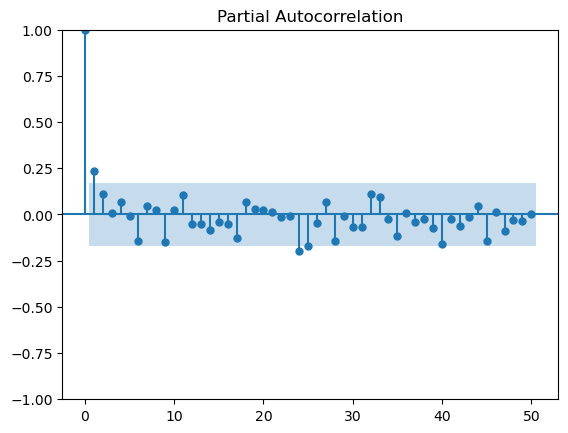

In [56]:
#PACF plot
sm.graphics.tsa.plot_pacf(results.resid, lags=50)
plt.show()

In [43]:
GLS_model = sm.GLSAR(y, X, rho=1)  #rho is the order of autoregression
GLS_results = GLS_model.iterative_fit()
GLS_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                GLSAR Regression Results                               
=======================================================================================
Dep. Variable:             TotalSales   R-squared (uncentered):                   0.968
Model:                          GLSAR   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              304.2
Date:                Wed, 20 Dec 2023   Prob (F-statistic):                    1.04e-83
Time:                        16:51:33   Log-Likelihood:                         -561.25
No. Observations:                 132   AIC:                                      1146.
Df Residuals:                     120   BIC:                                      1181.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AverageTemperature     0.8417      0.210      4.004      0.000       0.425       1.258
TotalPrecip            0.0141      0.020      0.721      0.472      -0.025       0.053
LocalUE                1.6792      1.051      1.598      0.113      -0.401       3.759
Recession            -43.8314     14.835     -2.955      0.004     -73.203     -14.460
TERMCBAUTO48NS        11.8057      3.246      3.637      0.000       5.379      18.232
UsedCPI               -0.1950      0.095     -2.060      0.042      -0.382      -0.008
GAPageviews            0.0002    9.1e-05      2.392      0.018    3.74e-05       0.000
BOBBDC                34.3007      5.624      6.099      0.000      23.166      45.435
TotalInventory         0.1732      0.058      2.997      0.003       0.059       0.288
q2                   -13.2003      7.101     -1.859      0.065     -27.259       0.859
q3                   -22.6568      8.325     -2.722      0.007     -39.139      -6.174
q4                   -12.5036      5.394     -2.318      0.022     -23.183      -1.824
==============================================================================
Omnibus:                        3.444   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.179   Jarque-Bera (JB):                2.377
Skew:                           0.147   Prob(JB):                        0.305
Kurtosis:                       2.412   Cond. No.                     4.71e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
OLS_params = OLS_results.params
GLS_params = GLS_results.params
param_frame = pd.DataFrame({"OLS": OLS_params, "GLS": GLS_params})
param_frame

,OLS,GLS
AverageTemperature,0.726372,0.841679
TotalPrecip,0.025858,0.014060
LocalUE,1.254053,1.679242
Recession,-40.974140,-43.831404
TERMCBAUTO48NS,10.887149,11.805664
UsedCPI,-0.195138,-0.194964
GAPageviews,0.000203,0.000218
BOBBDC,33.158101,34.300678
TotalInventory,0.238893,0.173173
q2,-10.514479,-13.200260
